# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Matjaz Cigler

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [129]:
# TODO: Import dataset and inspect the first five columns

df = pd.read_csv('seeds_dataset.txt', delimiter= '\t', header= None, names= 
                 ["area", "perimeter", "compactness", "length_of_kernal", "width_of_kernal",
                  "asymmetry_of_kernal", "length_of_kernal_groove", "type"])
df.head()

,area,perimeter,compactness,length_of_kernal,width_of_kernal,asymmetry_of_kernal,length_of_kernal_groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [130]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.iloc[:, :7]
y = df.type
print("Shape X: ", X.shape)
print("Shape y: ", y.shape)

Shape X:  (210, 7)
Shape y:  (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

Because k-means clustering uses distance I will use StandardScalar.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [131]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.2, random_state=0)

In [132]:
# TODO: Print the shape of the training feature matrix and target vector
print("Shape X_train: ", X_train.shape)
print("Shape y_train: ", y_train.shape)

Shape X_train:  (168, 7)
Shape y_train:  (168,)


Now that we have our training data, we can implement our selected scaler.

In [133]:
# TODO: Scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [134]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

lin_model = LogisticRegression(max_iter= 10000).fit(X_train, y_train)



### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [135]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [136]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(lin_model, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print(f'Best Parameters {grid.best_params_}')
print(f'Best Cross-Validation accuracy {grid.best_score_:.2f}')
print(f'Test accuracy {grid.score(X_val_scaled, y_val):.2f}')




Best Parameters {'C': 10.0, 'fit_intercept': True}
Best Cross-Validation accuracy 0.95
Test accuracy 0.95


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [137]:
# TODO: Predict y labels using best estimator
y_pred = grid.predict(X_val_scaled)



In [138]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 7 to 2 dimensions
X_val_projected = pca.fit_transform(X_val_scaled)
print(X_val_scaled.shape)
print(X_val_projected.shape)

(42, 7)
(42, 2)


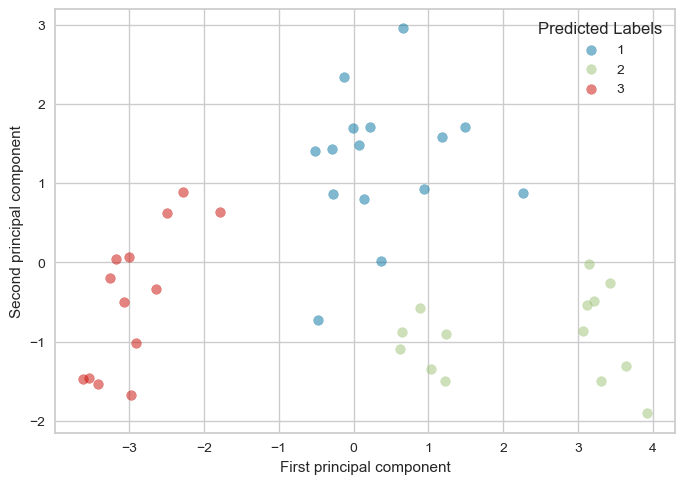

In [139]:
# TODO: Plot test points colored by predicted label
for label in set(y_pred):
    plt.scatter(X_val_projected[y_pred == label, 0], X_val_projected[y_pred == label, 1],
                label=label, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(title='Predicted Labels')

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*


1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

Answers:
1. Logistic Regression worked well, this can be seen by the testing score being 0.95 which means the model is accurate and generalized.

2. PCA worked well, you can see in the plot that the data is grouped well into the 3 types. This shows that the data fits well to a linear model.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

Answers:
1.  - https://chat.openai.com
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    - https://archive.ics.uci.edu/dataset/236/seeds
    
1. I completed the steps in order from 1-5

1. I just used generative AI to figure out how to create a legend instead of a colorbar in PCA, I modified the code to use a loop to plot the scatter instead of a static plot.

1. No challenges, the course notes and previous assignments were good references for my to use.

*DESCRIBE YOUR PROCESS HERE*

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [140]:

# TODO: Scale feature matrix
scaler.fit(X)
X_scaled = scaler.transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

c:\Users\cigle\anaconda3real\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cigle\anaconda3real\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cigle\anaconda3real\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cigle\anaconda3real\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.p

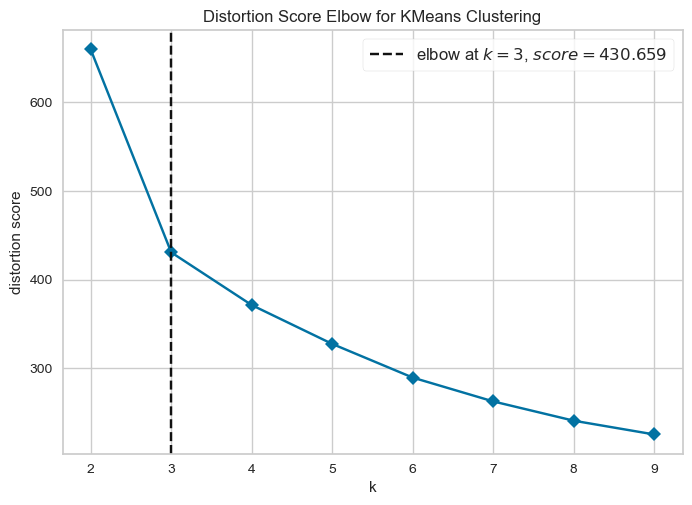

In [141]:

# # TODO: Use the elbow method to determine the optimal number of clusters

from yellowbrick.cluster.elbow import kelbow_visualizer
ke=kelbow_visualizer(KMeans(random_state=4, n_init=10), X_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)



Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [142]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmean_model = KMeans(n_clusters= 3, random_state= 0).fit(X_scaled)
clusters = kmean_model.predict(X_scaled)
kmean_model.cluster_centers_.shape

c:\Users\cigle\anaconda3real\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cigle\anaconda3real\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(3, 7)

In [143]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

print(f'Distorsion: {kmean_model.inertia_:.2f}')
print(f'Silhouette Score: {silhouette_score(X_scaled, kmean_model.labels_):.2f}')
print(f'Calinski Harabasz Score: {calinski_harabasz_score(X_scaled, kmean_model.labels_):.2f}')

Distorsion: 430.66
Silhouette Score: 0.40
Calinski Harabasz Score: 249.78


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

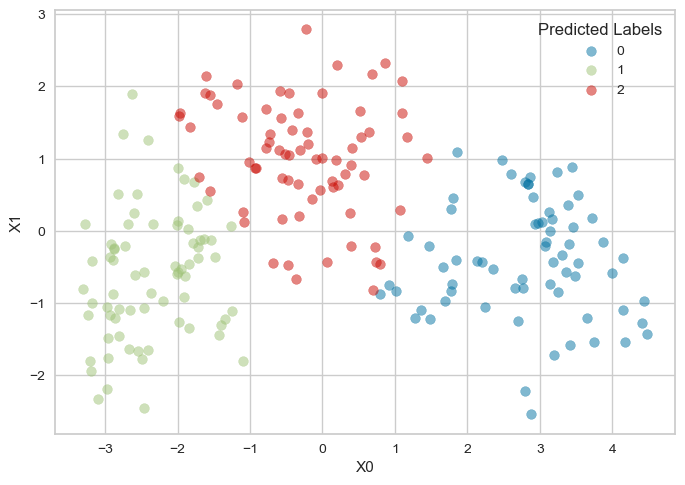

In [144]:
# TODO: Plot clustering result


pca = PCA()
projected = pca.fit_transform(X_scaled)

for label in set(clusters):
    plt.scatter(projected[clusters == label, 0], projected[clusters == label, 1],
                label=label, alpha=0.5)

plt.xlabel('X0')
plt.ylabel('X1')
plt.legend(title='Predicted Labels')




### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

2 components needed to get the number of components for 95% of the variance


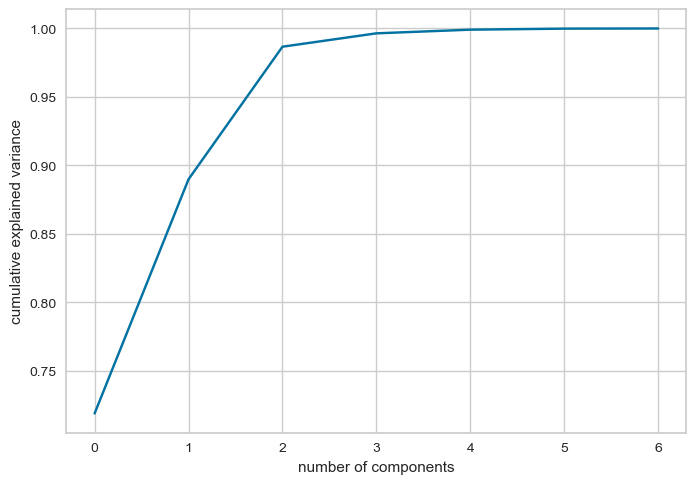

In [145]:
# TODO: Find the number of principal components using explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

#n_clusters where the cumulative explained variance is greater than or equal to 0.95
print(np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) , "components needed to get the number of components for 95% of the variance")


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [146]:
# TODO: Use PCA to transform the data
pca = PCA(n_components= 2)
projected_2 = pca.fit_transform(X_scaled)

In [147]:
# TODO: Implement K-means with the transformed data
kmean_model2 = KMeans(n_clusters= 3, random_state= 0).fit(projected_2)
clusters2 = kmean_model2.predict(projected_2)

c:\Users\cigle\anaconda3real\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cigle\anaconda3real\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [152]:
# TODO: Calculate the three different validation metrics

print(f'Distorsion: {kmean_model2.inertia_:.2f}')
print(f'Silhouette Score: {silhouette_score(projected_2, kmean_model2.labels_):.2f}')
print(f'Calinski Harabasz Score: {calinski_harabasz_score(projected_2, kmean_model2.labels_):.2f}')

Distorsion: 270.33
Silhouette Score: 0.49
Calinski Harabasz Score: 397.30


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [153]:
# TODO: Display results

results = pd.DataFrame({
    'Model': ['KMeans No-PCA', 'KMeans Using PCA'],
    'Distorsion': [kmean_model.inertia_, kmean_model2.inertia_],
    'Silhouette Score': [silhouette_score(X_scaled, kmean_model.labels_), silhouette_score(projected_2, kmean_model2.labels_)],
    'Calinski Harabasz Score': [calinski_harabasz_score(X_scaled, kmean_model.labels_), calinski_harabasz_score(projected_2, kmean_model2.labels_)]
})
results.set_index('Model', inplace= True)

results

,Distorsion,Silhouette Score,Calinski Harabasz Score
Model,,,
KMeans No-PCA,430.658973,0.400727,249.784175
KMeans Using PCA,270.331693,0.493430,397.301078


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


Answers:
1. Yes, optimal was 3 clusters and the dataset had 3 varieties of wheat.
2. Yes, the plots showed that both plots showed similar divisions.
3. I used 2 component which were all the components that explained 95% of the variance. All of my results improved. This is because reducing how many 
features there are decreased complexity and improved clustering accurancy (model was not trying to 'overthink' the results when they weren't relavent). 
PCA likely reduced noised and imporved regularization.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

Answers:
1.  - https://chat.openai.com
    - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    - https://archive.ics.uci.edu/dataset/236/seeds
    
1. I completed the steps in order from 1-3

1. I just used generative AI to do some debugging when my code didn't want to work for me.

1. No challenges, the course notes and previous assignments were good references for my to use.

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


Answers:
I found the questions and instructions pretty vague and hard to understand, I hope that I did everything in the way that wsas expected but the instructions seemed unclear for some parts. 

I found figuring out PCA slightly challenging but really fun and interesting.